In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

First, let us estabablish our null hypothesis and our alternate hypothesis.

$H_0$: There is no correlation between our independent variables (disabilities which inclusion measures are targeted at) and our dependent variable (change in Stock value)

$H_1$:  There is no correlation between our independent variables (disabilities which inclusion measures are targeted at) and our dependent variable (Change in Stock Value)

For the creation of our logistic regression model on a more developed dataset, it will be important to create a flexible pathway which can drop variables as needed. It is worth noting that, if this script is run as is, it is possible that the model will be affected by unforseen multicolinearity in the data. If this is the case, follow this [shortcut](#Shortcut) and make slight modifications in the script as instructed.

Now, let us read in and inspect our dataset.

In [19]:
df = pd.read_csv('Technology_Services_Accessibility_Initiatives.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company_Name      20 non-null     object 
 1   Initiative_Name   20 non-null     object 
 2   Date              20 non-null     object 
 3   Consumer_driven   20 non-null     int64  
 4   Autism            20 non-null     int64  
 5   Aging             20 non-null     int64  
 6   Deaf              20 non-null     int64  
 7   Blind             20 non-null     int64  
 8   Speech            20 non-null     int64  
 9   Light_sense       20 non-null     int64  
 10  Wheelchair        20 non-null     int64  
 11  ADHD              20 non-null     int64  
 12  Mental_Health     20 non-null     int64  
 13  Company_Code      20 non-null     object 
 14  Initiative_Close  20 non-null     float64
 15  Month_Close       20 non-null     float64
 16  Success           20 non-null     int64  
dtyp

When importing from our CSV file, most of our columns seem to have converted well. However, our `Date` column is not in the proper datetime64 format. We can resolve this issue using the `to_datetime` method in Pandas.

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0    2021-12-03
1    2021-04-28
2    2022-05-17
3    2019-12-03
4    2022-08-17
5    2021-05-20
6    2022-08-25
7    2019-12-27
8    2022-08-15
9    2019-09-25
10   2022-04-13
11   2019-08-22
12   2022-05-12
13   2021-07-26
14   2018-12-06
15   2022-10-05
16   2014-11-06
17   2021-02-12
18   2022-08-15
19   2022-05-17
Name: Date, dtype: datetime64[ns]

Next, we should inspect our columns to decide which of them should be our X variables and which should be our y variable.

In [4]:
df.columns

Index(['Company_Name', 'Initiative_Name', 'Date', 'Consumer_driven', 'Autism',
       'Aging', 'Deaf', 'Blind', 'Speech', 'Light_sense', 'Wheelchair', 'ADHD',
       'Mental_Health', 'Company_Code', 'Initiative_Close', 'Month_Close',
       'Success'],
      dtype='object')

In [ ]:
y_1 = df['Success']
y_1

In [18]:
X = df[['Consumer_driven', 'Autism', 'Aging', 'Deaf', 'Blind', 'Speech', 'Light_sense',
             'Wheelchair', 'ADHD', 'Mental_Health']]
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Consumer_driven  20 non-null     int64
 1   Autism           20 non-null     int64
 2   Aging            20 non-null     int64
 3   Deaf             20 non-null     int64
 4   Blind            20 non-null     int64
 5   Speech           20 non-null     int64
 6   Light_sense      20 non-null     int64
 7   Wheelchair       20 non-null     int64
 8   ADHD             20 non-null     int64
 9   Mental_Health    20 non-null     int64
dtypes: int64(10)
memory usage: 1.7 KB


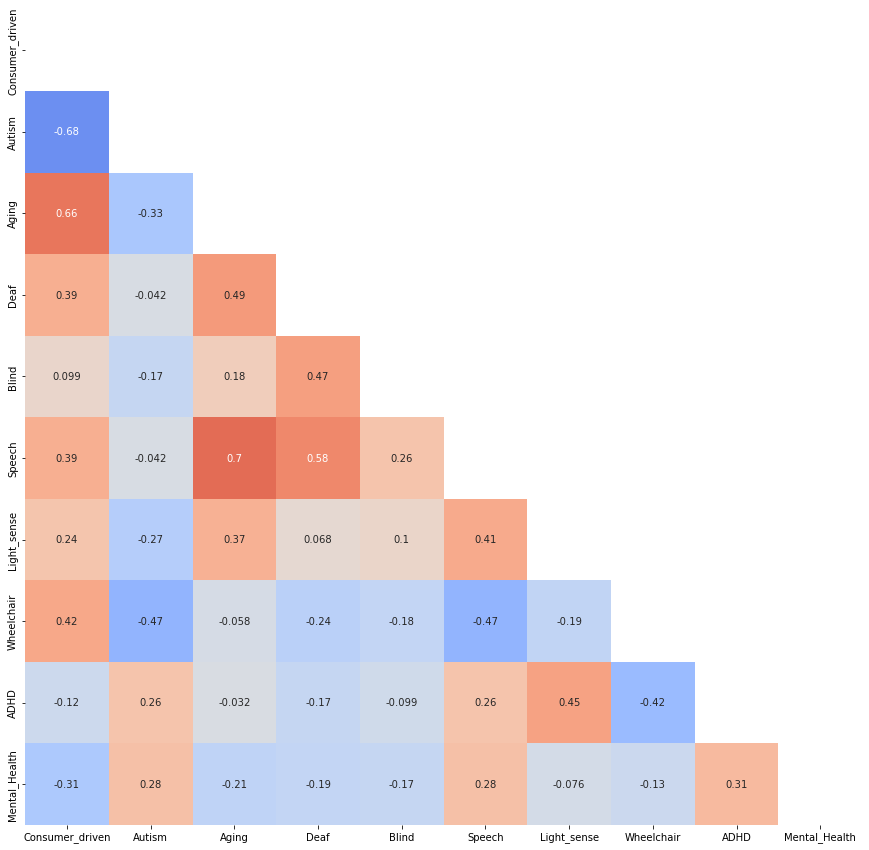

In [16]:
mask = np.triu(X.corr())

plt.figure(figsize=(15, 15))
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, mask=mask, center=0, cmap='coolwarm', cbar=False)
plt.show()

In [ ]:
"""
Multicolinear_Variables = []
X = X.drop(Multicolinear_Varliables, axis = 1)
"""

# Shortcut

If, on the first time running this model, the "logit_fitted" assignment statement below throws an error of some kind, uncomment the above codeblock and refer to to the SNS heatmap visualization above. If two X variables have a high correlation with one another, this means that they may be multicolinear, and could therefore undermine the statistical significance of the independent variable. For this reason, drop at least one variable from each pairing with a high correlation by entering the name of the variable ("NAME_VARIABLE") into the list in the `Multicolinear_Variables` assignment statement. Then, rerun the remainder of the notebook.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_1, test_size = 0.25)

Now that we have our train-test split, we should add our constant, instantiate the model, and fit the model on our training dataset.

In [9]:
# 0. ADD A CONSTANT
X_train_const = sm.add_constant(X_2)

# 1. Instantiate
success_logit = sm.Logit(y_train, X_train_const)

# 2. Fit
logit_fitted = success_logit.fit(maxiter=10000) #Fitting a logistic regression is typically not very
# computationally expensive, so 

# 3. Summarize the model performance
logit_fitted.summary()

Optimization terminated successfully.
         Current function value: 0.394896
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Success   No. Observations:                   20
Model:                          Logit   Df Residuals:                       15
Method:                           MLE   Df Model:                            4
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                  0.4132
Time:                        06:57:44   Log-Likelihood:                -7.8979
converged:                       True   LL-Null:                       -13.460
Covariance Type:            nonrobust   LLR p-value:                   0.02520
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1428      1.452     -1.475      0.140      -4.989       0.704
Aging          1.0900      1.414      0.771      0.441      -1.681       3.861
Blind         -1.1419      1.657     -0.689      0.491      -4.389       2.105
Wheelchair     0.3524      1.648      0.214      0.831      -2.878       3.583
ADHD           3.8410      1.608      2.388      0.017       0.689       6.993
==============================================================================
"""

Once our model has run smoothly, we now must decide whether we wish to accept the null hypothesis ($H0$) or whether we will reject it in favor of the alternate hypothetis ($H1$). If we choose to accept the null hypothesis, then our modeling is over. If not, then we can proceed on to creating our predictions given our X variables in the testing set.

In [ ]:
y_pred = logit_fitted.predict(X_test)

Now, we can use the `accuracy_score` metric in sklearn to see how well our predictions held up. Since our accuracy will, by default, be returned as a <=1 float, however, we will need to multiply it by 100 to convert it to a percentage.

In [ ]:
accuracy_percentage = accuracy_score(y_test, y_pred)*100
accuracy_percentage

Finally, we can create and visualize a confusion matrix using funtionalities in sklearn in order to discover what portions of our data our model did best or worst at.

In [ ]:
Confusion = confusion_matrix(y_test,y_pred, labels = ["Failure","Success"])

In [ ]:
ConfusionMatrixDisplay(Confusion, display_labels = labels)